### User behaviour

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-muted")

from sqlalchemy import create_engine, inspect   #presto

In [4]:
sns.set_style("white")

In [5]:
#setear usuario
usuario={"usuario":"leticia.colombo","contraseña":"Z7GWYgGGGsmvRZsZ7BTTF"}

In [6]:
#crear conexión
url="presto://"+usuario['usuario']+"@hue.peya.co:8889/hive/datalake"
engine = create_engine(url)
connection = engine.connect()

In [7]:
#Definir consulta
query='''
select *
from default.main_cuisine_abr_may
where cdcountry='Uruguay'
'''

In [8]:
#Ejecutar la consulta
main_cuisine = pd.read_sql(query,con=connection)
main_cuisine.head()

,userid,cdcountry,month,qty_shops,total_orders,not_weekend,weekend,lunes,martes,miercoles,...,helados,sushi,pollo,milanesas,sandwiches,other,order_discount,coupon,rating,amount
0,748231,Uruguay,5,2,2,2,0,0,0,1,...,1,0,0,0,0,0,1,1,4.47,166.63
1,57361,Uruguay,5,2,4,0,4,0,0,0,...,0,0,0,0,0,0,4,0,4.59,472.25
2,17782395,Uruguay,5,1,2,2,0,0,0,0,...,0,0,0,0,0,0,1,1,4.65,430.00
3,377317,Uruguay,5,2,2,1,1,0,1,0,...,0,0,0,0,0,1,2,0,4.53,878.63
4,4456694,Uruguay,5,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,4.11,170.00


In [9]:
main_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315709 entries, 0 to 315708
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   userid               315709 non-null  object
 1   cdcountry            315709 non-null  object
 2   month                315709 non-null  int64 
 3   qty_shops            315709 non-null  int64 
 4   total_orders         315709 non-null  int64 
 5   not_weekend          315709 non-null  int64 
 6   weekend              315709 non-null  int64 
 7   lunes                315709 non-null  int64 
 8   martes               315709 non-null  int64 
 9   miercoles            315709 non-null  int64 
 10  jueves               315709 non-null  int64 
 11  viernes              315709 non-null  int64 
 12  sabado               315709 non-null  int64 
 13  domingo              315709 non-null  int64 
 14  lunch                315709 non-null  int64 
 15  dinner               315709 non-nu

In [12]:
main_cuisine.describe()

,month,qty_shops,total_orders,not_weekend,weekend,lunes,martes,miercoles,jueves,viernes,...,pizzas,empanadas,helados,sushi,pollo,milanesas,sandwiches,other,order_discount,coupon
count,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,...,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.000000,315709.0,315709.000000,315709.000000,315709.000000
mean,4.525357,2.242562,2.885781,1.380905,1.504879,0.316884,0.314920,0.359736,0.389368,0.443475,...,0.925371,0.197419,0.172916,0.083168,0.035317,0.139708,0.0,0.728605,1.151323,0.297863
std,0.499357,1.951835,3.184211,1.938722,1.811993,0.687651,0.666961,0.719029,0.755419,0.769653,...,1.349661,0.603741,0.547899,0.385844,0.265571,0.516355,0.0,1.447499,1.729077,0.623260
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,5.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
max,5.000000,62.000000,387.000000,165.000000,222.000000,45.000000,26.000000,32.000000,65.000000,69.000000,...,29.000000,22.000000,21.000000,24.000000,16.000000,25.000000,0.0,46.000000,406.000000,16.000000


In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [14]:
print( "Total de usuarios:" 
      , main_cuisine.userid.loc[((main_cuisine.total_orders>=1)&(main_cuisine.month==5))].count()
      ,"Total de órdenes:"
      , main_cuisine.total_orders.loc[((main_cuisine.total_orders>=1)&(main_cuisine.month==5))].sum()

     )

Total de usuarios: 165860 Total de órdenes: 478060


#### Usuarios que realizaron 1 o 2 órdenes en el mes

In [20]:
main_cuisine.total_orders.loc[((main_cuisine.total_orders<3)&(main_cuisine.month==5))].count()/main_cuisine.total_orders.loc[(main_cuisine.month==5)].count()

0.6337453273845411

In [18]:
main_cuisine.total_orders.loc[((main_cuisine.total_orders<3)&(main_cuisine.month==5))].sum()/main_cuisine.total_orders.loc[(main_cuisine.month==5)].sum()

0.29169141948709365

#### Usuarios que realizaron 3 o más en el mes

In [21]:
main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count()

60747

In [22]:
main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count()/main_cuisine.total_orders.loc[(main_cuisine.month==5)].count()

0.3662546726154588

In [23]:
main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].sum()/main_cuisine.total_orders.loc[(main_cuisine.month==5)].sum()

0.7083085805129063

In [24]:
# qty orders 
round(main_cuisine.total_orders.loc[(main_cuisine.month==5)].value_counts(sort = True, dropna = True, ascending= False, normalize = False),2).head(10)

1     70780
2     34333
3     19856
4     12339
5      8047
6      5438
7      3931
8      2727
9      2024
10     1434
Name: total_orders, dtype: int64

In [25]:
# qty orders distribution
round(main_cuisine.total_orders.loc[(main_cuisine.month==5)].value_counts(sort = True, dropna = True, ascending= False, normalize = True),2).head(10)

1    0.43
2    0.21
3    0.12
4    0.07
5    0.05
6    0.03
7    0.02
8    0.02
9    0.01
10   0.01
Name: total_orders, dtype: float64

In [26]:
print("El", round((main_cuisine.total_orders.loc[((main_cuisine.total_orders<=2)&(main_cuisine.month==5))].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5))].count())*100,0)
      , "% de los usuarios que tuvieron una o dos órdenes en mayo hacen el"
      ,round((main_cuisine.total_orders.loc[((main_cuisine.total_orders<=2)&(main_cuisine.month==5))].sum()/main_cuisine.total_orders.loc[((main_cuisine.month==5))].sum())*100,0)
, "% de las órdenes, mientras que el"    
, round((main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5))].count())*100,0)
, "% de los usuarios que realizaron 3 o más órdenes en mayo hacen el"
,round((main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].sum()/main_cuisine.total_orders.loc[((main_cuisine.month==5))].sum())*100,0)
, "% de las órdenes."    
     )


El 63.0 % de los usuarios que tuvieron una o dos órdenes en mayo hacen el 29.0 % de las órdenes, mientras que el 37.0 % de los usuarios que realizaron 3 o más órdenes en mayo hacen el 71.0 % de las órdenes.


## Se crean las variables para clasificar al usuario

Teniendo información sobre la cantidad de veces que pidió entre semana o fin de semana o en los main cuisine en los que ordenó se crean las variables para detectar si tienen un top o no.

In [27]:
main_cuisine.rename(columns={'filter':'filter_tr'}, inplace=True)
main_cuisine.columns

Index(['userid', 'cdcountry', 'month', 'qty_shops', 'total_orders',
       'not_weekend', 'weekend', 'lunes', 'martes', 'miercoles', 'jueves',
       'viernes', 'sabado', 'domingo', 'lunch', 'dinner', 'shop_list',
       'filter_tr', 'search', 'order_through_other', 'hamburguesas', 'pizzas',
       'empanadas', 'helados', 'sushi', 'pollo', 'milanesas', 'sandwiches',
       'other', 'order_discount', 'coupon', 'rating', 'amount'],
      dtype='object')

### Quantity parteners over total orders 

In [28]:
# qty partners
main_cuisine['p_qty']=np.round((main_cuisine.qty_shops/main_cuisine.total_orders),1)

In [29]:
np.round(main_cuisine.qty_shops.value_counts(sort = False, dropna = True, ascending= False, normalize = True, bins = 10),2)

(0.938, 7.1]   0.97
(7.1, 13.2]    0.02
(13.2, 19.3]   0.00
(19.3, 25.4]   0.00
(25.4, 31.5]   0.00
(31.5, 37.6]   0.00
(37.6, 43.7]   0.00
(43.7, 49.8]   0.00
(49.8, 55.9]   0.00
(55.9, 62.0]   0.00
Name: qty_shops, dtype: float64

In [32]:
main_cuisine['partners']=0
main_cuisine.partners[main_cuisine.qty_shops.loc[main_cuisine.qty_shops==1].index]=1

C:\Users\leticia.colombo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# distribución de ordenes entre semana vs. fin de semana
main_cuisine['p_wknd_orders']=np.round((main_cuisine.weekend/main_cuisine.total_orders),1)
main_cuisine['p_week_orders']=np.round((main_cuisine.not_weekend/main_cuisine.total_orders),1)

# distribución de ordenes por día
main_cuisine['p_lunes']=np.round((main_cuisine.lunes/main_cuisine.total_orders),1)
main_cuisine['p_martes']=np.round((main_cuisine.martes/main_cuisine.total_orders),1)
main_cuisine['p_miercoles']=np.round((main_cuisine.miercoles/main_cuisine.total_orders),1)
main_cuisine['p_jueves']=np.round((main_cuisine.jueves/main_cuisine.total_orders),1)
main_cuisine['p_viernes']=np.round((main_cuisine.viernes/main_cuisine.total_orders),1)
main_cuisine['p_sabado']=np.round((main_cuisine.sabado/main_cuisine.total_orders),1)
main_cuisine['p_domingo']=np.round((main_cuisine.domingo/main_cuisine.total_orders),1)

main_cuisine['día']=np.round((main_cuisine.domingo/main_cuisine.total_orders),1)

# distribución de ordenes en el día
main_cuisine['p_lunch_orders']=np.round((main_cuisine.lunch/main_cuisine.total_orders),1)
main_cuisine['p_dinner_orders']=np.round((main_cuisine.dinner/main_cuisine.total_orders),1)

# distribución de ordenes en el día
main_cuisine['p_hamburguesas']=np.round((main_cuisine.hamburguesas/main_cuisine.total_orders),1)
main_cuisine['p_pizzas']=np.round((main_cuisine.pizzas/main_cuisine.total_orders),1)
main_cuisine['p_empanadas']=np.round((main_cuisine.empanadas/main_cuisine.total_orders),1)
main_cuisine['p_helados']=np.round((main_cuisine.helados/main_cuisine.total_orders),1)
main_cuisine['p_sushi']=np.round((main_cuisine.sushi/main_cuisine.total_orders),1)
main_cuisine['p_pollo']=np.round((main_cuisine.pollo/main_cuisine.total_orders),1)
main_cuisine['p_milanesas']=np.round((main_cuisine.milanesas/main_cuisine.total_orders),1)
main_cuisine['p_sandwiches']=np.round((main_cuisine.sandwiches/main_cuisine.total_orders),1)



# distribución de ordenes por lugar
main_cuisine['p_shop_list']=np.round((main_cuisine.shop_list/main_cuisine.total_orders),1)
main_cuisine['p_filter_tr']=np.round((main_cuisine.filter_tr/main_cuisine.total_orders),1)
main_cuisine['p_search']=np.round((main_cuisine.search/main_cuisine.total_orders),1)

# cupones y descuentos
main_cuisine['p_order_discount']=np.round((main_cuisine.order_discount/main_cuisine.total_orders),1)
main_cuisine['p_coupon']=np.round((main_cuisine.coupon/main_cuisine.total_orders),1)


In [34]:
main_cuisine.p_dinner_orders[main_cuisine.p_dinner_orders.loc[main_cuisine.p_dinner_orders>1].index]=0
main_cuisine.p_lunch_orders[main_cuisine.p_lunch_orders.loc[main_cuisine.p_lunch_orders>1].index]=0
main_cuisine.p_qty.loc[main_cuisine.p_qty.loc[main_cuisine.p_qty>1].index]=0
main_cuisine.p_order_discount[main_cuisine.p_order_discount.loc[main_cuisine.p_order_discount>1].index]=0
main_cuisine.p_coupon[main_cuisine.p_coupon.loc[main_cuisine.p_coupon>1].index]=0

C:\Users\leticia.colombo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\leticia.colombo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leticia.colombo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_

### Compran siempre en el mismo partner

In [81]:

print("De los" 
      , main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count()
      , "usuarios que tuvieron tres o  más órdenes en mayo"
      , main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)
                                       &(main_cuisine.total_orders>=3))].count()
      ," compraron siempre en el mismo cuisine. Son un"
      ,round((main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)
                               &(main_cuisine.total_orders>=3))].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5))].count())*100,1)
      
      ,"% del total de usuarios y un"
      ,round((main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)
                               &(main_cuisine.total_orders>=3))].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3))].count())*100,1)

      ,"% de los que hicieron tres o más órdenes. Total de órdenes de los que compraron siempre en el mismo cuisine"
      , main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1) & (main_cuisine.total_orders>=3)
                                       &(main_cuisine.month==5))].sum()
  )

De los 60747 usuarios que tuvieron tres o  más órdenes en mayo 2862  compraron siempre en el mismo cuisine. Son un 1.7 % del total de usuarios y un 4.7 % de los que hicieron tres o más órdenes. Total de órdenes de los que compraron siempre en el mismo cuisine 10688


In [74]:
main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3))].count()

2862

In [77]:
main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)
                               &(main_cuisine.total_orders>=3))].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3))].count()

0.04711343770062719

In [36]:
# mismo partner y mismo día de semana

main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3)&                              
                             ((main_cuisine.p_lunes==1)|(main_cuisine.p_martes==1)|(main_cuisine.p_miercoles==1)|
                                     (main_cuisine.p_jueves==1)|(main_cuisine.p_viernes==1)|(main_cuisine.p_sabado==1)|(main_cuisine.p_domingo==1)) 
                              
                              )].count()

229

In [39]:
# mismo partner y entre semana o fin de semana

main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3)&                              
                             ((main_cuisine.p_week_orders==1)|(main_cuisine.p_wknd_orders==1))                               
                              )].count()

970

In [42]:
# mismo partner en la noche
print(main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3)&                              
                             ((main_cuisine.p_dinner_orders==1))                               
                              )].count()
      , round(main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3)&                              
                             ((main_cuisine.p_dinner_orders==1))                               
                              )].count()/main_cuisine.total_orders.loc[((main_cuisine.qty_shops==1)&(main_cuisine.month==5)&(main_cuisine.total_orders>=3))].count(),2)
     )

1358 0.47


### Compran siempre en el mismo cuisine

In [45]:
# mayo y más de 3 órdenes
main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3))
                              ].count()

60747

In [68]:
print("De los" 
      , main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count()
      , "usuarios que tuvieron tres o  más órdenes en mayo"
      ,main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()
      ," compraron siempre en el mismo cuisine. Son un"
      ,round((main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()
              /main_cuisine.total_orders.loc[((main_cuisine.month==5))].count())*100,1)
      
      ,"% del total de usuarios y un"
      ,round((main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()
              /main_cuisine.total_orders.loc[((main_cuisine.total_orders>=3)&(main_cuisine.month==5))].count())*100,1)

      ,"% de los que hicieron tres o más órdenes. Total de órdenes de los que compraron siempre en el mismo cuisine"
      ,main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].sum()
  )



De los 60747 usuarios que tuvieron tres o  más órdenes en mayo 5916  compraron siempre en el mismo cuisine. Son un 3.6 % del total de usuarios y un 9.7 % de los que hicieron tres o más órdenes. Total de órdenes de los que compraron siempre en el mismo cuisine 22803


In [46]:
# siempre en el mismo main cuisine
main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()

5916

In [60]:
# siempre en el mismo main cuisine
print('Son un'
     , round((main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5))
                              ].count())*100,1)
      , 'del total de usuarios y un'
      , round((main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].count()/main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3))
                              ].count())*100,1)
      ,'de los usuarios que hicieron más de tres órdenes en el mes.'
     )

Son un 3.6 del total de usuarios y un 9.7 de los usuarios que hicieron más de tres órdenes en el mes.


In [62]:
# siempre en el mismo main cuisine, total de órdenes
main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))
                              )].sum()

22803

In [64]:
# siempre en el mismo main cuisine y entre semana o fin de semana
main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))&
                               (((main_cuisine.p_wknd_orders==1)|(main_cuisine.p_week_orders==1))) 
                              )].count()

1819

In [61]:
# siempre en el mismo main cuisine y en la noche
main_cuisine.total_orders.loc[((main_cuisine.month==5)&(main_cuisine.total_orders>=3)&
                              ((main_cuisine.p_helados==1)|(main_cuisine.p_hamburguesas==1)|(main_cuisine.p_pizzas==1)|
                               (main_cuisine.p_empanadas==1)|(main_cuisine.p_sushi==1)|(main_cuisine.p_pollo==1)|
                               (main_cuisine.p_milanesas==1)|(main_cuisine.p_sandwiches==1))&
                               ((main_cuisine.p_dinner_orders==1)) 
                              )].count()

2778

In [259]:
mcm=main_cuisine[['userid','month','total_orders','partners', 'p_wknd_orders', 'p_week_orders',
       'p_lunes', 'p_martes', 'p_miercoles', 'p_jueves', 'p_viernes',
       'p_sabado', 'p_domingo', 'p_lunch_orders', 'p_dinner_orders',
       'p_hamburguesas', 'p_pizzas', 'p_empanadas', 'p_helados','p_sushi','p_pollo'
                  ,'p_milanesas','p_sandwiches','p_order_discount','p_coupon']].copy()

In [260]:
mcm[[ 'p_wknd_orders', 'p_week_orders',
       'p_lunes', 'p_martes', 'p_miercoles', 'p_jueves', 'p_viernes',
       'p_sabado', 'p_domingo', 'p_lunch_orders', 'p_dinner_orders',
       'p_hamburguesas', 'p_pizzas', 'p_empanadas', 'p_helados','p_sushi','p_pollo'
                  ,'p_milanesas','p_sandwiches']]=mcm[['p_wknd_orders', 'p_week_orders',
       'p_lunes', 'p_martes', 'p_miercoles', 'p_jueves', 'p_viernes',
       'p_sabado', 'p_domingo', 'p_lunch_orders', 'p_dinner_orders',
       'p_hamburguesas', 'p_pizzas', 'p_empanadas', 'p_helados','p_sushi','p_pollo'
                  ,'p_milanesas','p_sandwiches']].replace([0.10,0.20,0.30,.40,0.50,0.60,0.70,0.80,0.90],0)

In [261]:
mcm.columns

Index(['userid', 'month', 'total_orders', 'partners', 'p_wknd_orders',
       'p_week_orders', 'p_lunes', 'p_martes', 'p_miercoles', 'p_jueves',
       'p_viernes', 'p_sabado', 'p_domingo', 'p_lunch_orders',
       'p_dinner_orders', 'p_hamburguesas', 'p_pizzas', 'p_empanadas',
       'p_helados', 'p_sushi', 'p_pollo', 'p_milanesas', 'p_sandwiches',
       'p_order_discount', 'p_coupon'],
      dtype='object')

In [262]:
mcm.describe()

,month,total_orders,partners,p_wknd_orders,p_week_orders,p_lunes,p_martes,p_miercoles,p_jueves,p_viernes,...,p_hamburguesas,p_pizzas,p_empanadas,p_helados,p_sushi,p_pollo,p_milanesas,p_sandwiches,p_order_discount,p_coupon
count,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,...,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00,3238002.00
mean,4.50,2.61,0.53,0.37,0.29,0.05,0.05,0.06,0.07,0.07,...,0.09,0.05,0.07,0.18,0.02,0.00,0.02,0.00,0.33,0.21
std,0.50,2.80,0.50,0.48,0.45,0.23,0.22,0.24,0.26,0.26,...,0.28,0.22,0.26,0.38,0.12,0.07,0.15,0.00,0.42,0.38
min,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.30
max,5.00,147.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00


In [264]:
mcm.head()

,userid,month,total_orders,partners,p_wknd_orders,p_week_orders,p_lunes,p_martes,p_miercoles,p_jueves,...,p_hamburguesas,p_pizzas,p_empanadas,p_helados,p_sushi,p_pollo,p_milanesas,p_sandwiches,p_order_discount,p_coupon
0,12428378,4,1,1,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,18379938,5,3,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,12886415,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,19287823,5,2,0,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50
4,16545147,5,6,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20


### Creo tablas para abril y mayo

In [265]:
mcm_abr=mcm[((mcm.month==4)&(mcm.total_orders>=3))]
mcm_abr=mcm_abr.drop('month',axis=1)
mcm_abr.describe()

,total_orders,partners,p_wknd_orders,p_week_orders,p_lunes,p_martes,p_miercoles,p_jueves,p_viernes,p_sabado,...,p_hamburguesas,p_pizzas,p_empanadas,p_helados,p_sushi,p_pollo,p_milanesas,p_sandwiches,p_order_discount,p_coupon
count,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,...,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00
mean,5.34,0.04,0.09,0.09,0.00,0.00,0.00,0.01,0.00,0.01,...,0.01,0.01,0.01,0.05,0.00,0.00,0.00,0.00,0.25,0.10
std,3.56,0.20,0.29,0.29,0.05,0.04,0.07,0.07,0.07,0.08,...,0.10,0.07,0.10,0.21,0.04,0.01,0.05,0.00,0.30,0.20
min,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00
75%,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.10
max,116.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00


In [266]:
mcm_may=mcm[((mcm.month==5)&(mcm.total_orders>=3))]
mcm_may=mcm_may.drop('month',axis=1)
mcm_may.describe()

,total_orders,partners,p_wknd_orders,p_week_orders,p_lunes,p_martes,p_miercoles,p_jueves,p_viernes,p_sabado,...,p_hamburguesas,p_pizzas,p_empanadas,p_helados,p_sushi,p_pollo,p_milanesas,p_sandwiches,p_order_discount,p_coupon
count,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,...,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00
mean,5.42,0.04,0.15,0.05,0.00,0.00,0.00,0.00,0.00,0.01,...,0.02,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.22,0.06
std,3.62,0.20,0.36,0.22,0.04,0.05,0.04,0.04,0.05,0.12,...,0.14,0.08,0.09,0.15,0.04,0.02,0.04,0.00,0.27,0.16
min,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00
75%,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00
max,147.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00


In [143]:
print( "Total de usuarios abril:" 
      , mcm_abr.userid.count()
      , "- Total de usuarios mayo:" 
      , mcm_may.userid.count()
     )

Total de usuarios abril: 493758 - Total de usuarios mayo: 539914


### Concatenar mayo con abril por usuario

In [268]:
mcm_abr.userid=mcm_abr.userid.astype('int64')
mcm_may.userid=mcm_may.userid.astype('int64')

In [269]:
mcm_s=mcm_may.merge(mcm_abr, how="outer", on="userid", suffixes=( '_may','_abr'))

In [273]:
mcm_s['users']=1

In [274]:
mcm_s.head(20)

,userid,total_orders_may,partners_may,p_wknd_orders_may,p_week_orders_may,p_lunes_may,p_martes_may,p_miercoles_may,p_jueves_may,p_viernes_may,...,p_pizzas_abr,p_empanadas_abr,p_helados_abr,p_sushi_abr,p_pollo_abr,p_milanesas_abr,p_sandwiches_abr,p_order_discount_abr,p_coupon_abr,users
0,18379938,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
1,16545147,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
2,6975189,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,1
3,6932103,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
4,15277379,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,20736531,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
6,18288525,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.40,1
7,5409789,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
8,2001365,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
9,6703485,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1


In [201]:
print( "Total de usuarios:" 
      , mcm_s.total_orders_may.dropna().count()
    
     )

Total de usuarios: 539914


In [283]:
mcm_s.describe()

,userid,total_orders_may,partners_may,p_wknd_orders_may,p_week_orders_may,p_lunes_may,p_martes_may,p_miercoles_may,p_jueves_may,p_viernes_may,...,p_pizzas_abr,p_empanadas_abr,p_helados_abr,p_sushi_abr,p_pollo_abr,p_milanesas_abr,p_sandwiches_abr,p_order_discount_abr,p_coupon_abr,users
count,758527.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,...,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,758527.00
mean,11009628.10,5.42,0.04,0.15,0.05,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.05,0.00,0.00,0.00,0.00,0.25,0.10,1.00
std,7039717.68,3.62,0.20,0.36,0.22,0.04,0.05,0.04,0.04,0.05,...,0.07,0.10,0.21,0.04,0.01,0.05,0.00,0.30,0.20,0.00
min,49.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,4466168.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,12328353.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,1.00
75%,17734370.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.10,1.00
max,22205824.00,147.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00


In [284]:
mcm_s.total_orders_may.sum()

2926777.0

In [285]:
# qty orders distribution
round(mcm_s.total_orders_may.value_counts(sort = True, dropna = True, ascending= False, normalize = True),2).head(10)

3.00    0.35
4.00    0.21
5.00    0.13
6.00    0.09
7.00    0.06
8.00    0.04
9.00    0.03
10.00   0.02
11.00   0.02
12.00   0.01
Name: total_orders_may, dtype: float64

In [286]:
# qty orders distribution
round(mcm_s.total_orders_abr.value_counts(sort = True, dropna = True, ascending= False, normalize = True),2).head(10)

3.00    0.36
4.00    0.21
5.00    0.13
6.00    0.09
7.00    0.06
8.00    0.04
9.00    0.03
10.00   0.02
11.00   0.02
12.00   0.01
Name: total_orders_abr, dtype: float64

In [287]:
mcm_s.loc[((mcm_s.total_orders_may<=3) & (mcm_s.total_orders_may>0)) ].shape[0]/mcm_s.loc[mcm_s.total_orders_may>0].shape[0]

0.345051248902603

In [288]:
mcm_s.loc[((mcm_s.total_orders_abr<=3) & (mcm_s.total_orders_abr>0)) ].shape[0]/mcm_s.loc[mcm_s.total_orders_abr>0].shape[0]

0.3553258883906691

In [116]:
# Total Orders
mcm_s.groupby("total_orders_may").total_orders_may.sum().nlargest(n=10)

total_orders_may
3     558894
4     447240
5     359365
6     279768
7     227437
8     181400
9     144945
10    120260
11     97504
12     79476
Name: total_orders_may, dtype: int64

In [117]:
# Total Orders
round((mcm_s.groupby("total_orders_may").total_orders_may.sum().nlargest(n=10)/mcm_s.total_orders_may.sum())*100,0)

total_orders_may
3    19.00
4    15.00
5    12.00
6    10.00
7     8.00
8     6.00
9     5.00
10    4.00
11    3.00
12    3.00
Name: total_orders_may, dtype: float64

In [118]:
print("El", round((mcm_s.total_orders_may.loc[(mcm_s.total_orders_may<3)].count()/mcm_s.total_orders_may.count())*100,0)
      , "% de los usuarios que tuvieron una o dos órdenes en mayo hacen el",round((mcm_s.total_orders_may.loc[(mcm_s.total_orders_may<3)].sum()/mcm_s.total_orders_may.sum())*100,0)
      , "% de las órdenes, mientras que el"    
      , round((mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count()/mcm_s.total_orders_may.count())*100,0)
      , "% de los usuarios que realizaron 3 o más órdenes en mayo hacen el",round((mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].sum()/mcm_s.total_orders_may.sum())*100,0)
      , "% de las órdenes."    
     )


El 0.0 % de los usuarios que tuvieron una o dos órdenes en mayo hacen el 0.0 % de las órdenes, mientras que el 100.0 % de los usuarios que realizaron 3 o más órdenes en mayo hacen el 100.0 % de las órdenes.


## TOPS

In [289]:
mcm_s.describe()

,userid,total_orders_may,partners_may,p_wknd_orders_may,p_week_orders_may,p_lunes_may,p_martes_may,p_miercoles_may,p_jueves_may,p_viernes_may,...,p_pizzas_abr,p_empanadas_abr,p_helados_abr,p_sushi_abr,p_pollo_abr,p_milanesas_abr,p_sandwiches_abr,p_order_discount_abr,p_coupon_abr,users
count,758527.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,539914.00,...,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,493758.00,758527.00
mean,11009628.10,5.42,0.04,0.15,0.05,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.05,0.00,0.00,0.00,0.00,0.25,0.10,1.00
std,7039717.68,3.62,0.20,0.36,0.22,0.04,0.05,0.04,0.04,0.05,...,0.07,0.10,0.21,0.04,0.01,0.05,0.00,0.30,0.20,0.00
min,49.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,4466168.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,12328353.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,1.00
75%,17734370.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.10,1.00
max,22205824.00,147.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00


In [290]:
mcm_s['main_cuisine_abr']=0
mcm_s['main_cuisine_may']=0

In [291]:
mcm_s.main_cuisine_abr.loc[((mcm_s.p_helados_abr==1)|(mcm_s.p_hamburguesas_abr==1)|(mcm_s.p_pizzas_abr==1)|
                                     (mcm_s.p_empanadas_abr==1)|(mcm_s.p_sushi_abr==1)|(mcm_s.p_pollo_abr==1)|(mcm_s.p_milanesas_abr==1)|(mcm_s.p_sandwiches_abr==1))]=1
mcm_s.main_cuisine_may.loc[((mcm_s.p_helados_may==1)|(mcm_s.p_hamburguesas_may==1)|(mcm_s.p_pizzas_may==1)|
                                     (mcm_s.p_empanadas_may==1)|(mcm_s.p_sushi_may==1)|(mcm_s.p_pollo_may==1)|(mcm_s.p_milanesas_may==1)|(mcm_s.p_sandwiches_may==1))]=1

C:\Users\leticia.colombo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [307]:
mcm_s['dia_abr']=0
mcm_s['dia_may']=0

In [309]:
mcm_s.dia_abr.loc[((mcm_s.p_lunes_abr==1)|(mcm_s.p_martes_abr==1)|(mcm_s.p_miercoles_abr==1)|
                                     (mcm_s.p_jueves_abr==1)|(mcm_s.p_viernes_abr==1)|(mcm_s.p_sabado_abr==1)|(mcm_s.p_domingo_abr==1))]=1
mcm_s.dia_may.loc[((mcm_s.p_lunes_may==1)|(mcm_s.p_martes_may==1)|(mcm_s.p_miercoles_may==1)|
                                     (mcm_s.p_jueves_may==1)|(mcm_s.p_viernes_may==1)|(mcm_s.p_sabado_may==1)|(mcm_s.p_domingo_may==1))]=1


C:\Users\leticia.colombo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [292]:
mcm_s.main_cuisine_abr.value_counts(sort = True, dropna = True, ascending= False, normalize = False)

0    722070
1     36457
Name: main_cuisine_abr, dtype: int64

In [293]:
mcm_s.main_cuisine_may.value_counts(sort = True, dropna = True, ascending= False, normalize = False)

0    724794
1     33733
Name: main_cuisine_may, dtype: int64

In [294]:
pd.crosstab(index=mcm_s.main_cuisine_may.fillna('missing'),columns=mcm_s.main_cuisine_abr.fillna('missing'),
            values = mcm_s.total_orders_may.fillna('missing') , aggfunc = "count", dropna=False, margins=True, normalize= False)

main_cuisine_abr,0,1,All
main_cuisine_may,,,
0,691086,33708,724794
1,30984,2749,33733
All,722070,36457,758527


In [310]:
pd.crosstab(index=mcm_s.dia_may.fillna('missing'),columns=mcm_s.dia_abr.fillna('missing'),
            values = mcm_s.total_orders_may.fillna('missing') , aggfunc = "count", dropna=False, margins=True, normalize= False)

dia_abr,0,1,All
dia_may,,,
0,724413,16002,740415
1,17743,369,18112
All,742156,16371,758527


In [308]:
mcm_s.columns

Index(['userid', 'total_orders_may', 'partners_may', 'p_wknd_orders_may',
       'p_week_orders_may', 'p_lunes_may', 'p_martes_may', 'p_miercoles_may',
       'p_jueves_may', 'p_viernes_may', 'p_sabado_may', 'p_domingo_may',
       'p_lunch_orders_may', 'p_dinner_orders_may', 'p_hamburguesas_may',
       'p_pizzas_may', 'p_empanadas_may', 'p_helados_may', 'p_sushi_may',
       'p_pollo_may', 'p_milanesas_may', 'p_sandwiches_may',
       'p_order_discount_may', 'p_coupon_may', 'total_orders_abr',
       'partners_abr', 'p_wknd_orders_abr', 'p_week_orders_abr', 'p_lunes_abr',
       'p_martes_abr', 'p_miercoles_abr', 'p_jueves_abr', 'p_viernes_abr',
       'p_sabado_abr', 'p_domingo_abr', 'p_lunch_orders_abr',
       'p_dinner_orders_abr', 'p_hamburguesas_abr', 'p_pizzas_abr',
       'p_empanadas_abr', 'p_helados_abr', 'p_sushi_abr', 'p_pollo_abr',
       'p_milanesas_abr', 'p_sandwiches_abr', 'p_order_discount_abr',
       'p_coupon_abr', 'users', 'main_cuisine_abr', 'main_cuisine_may',

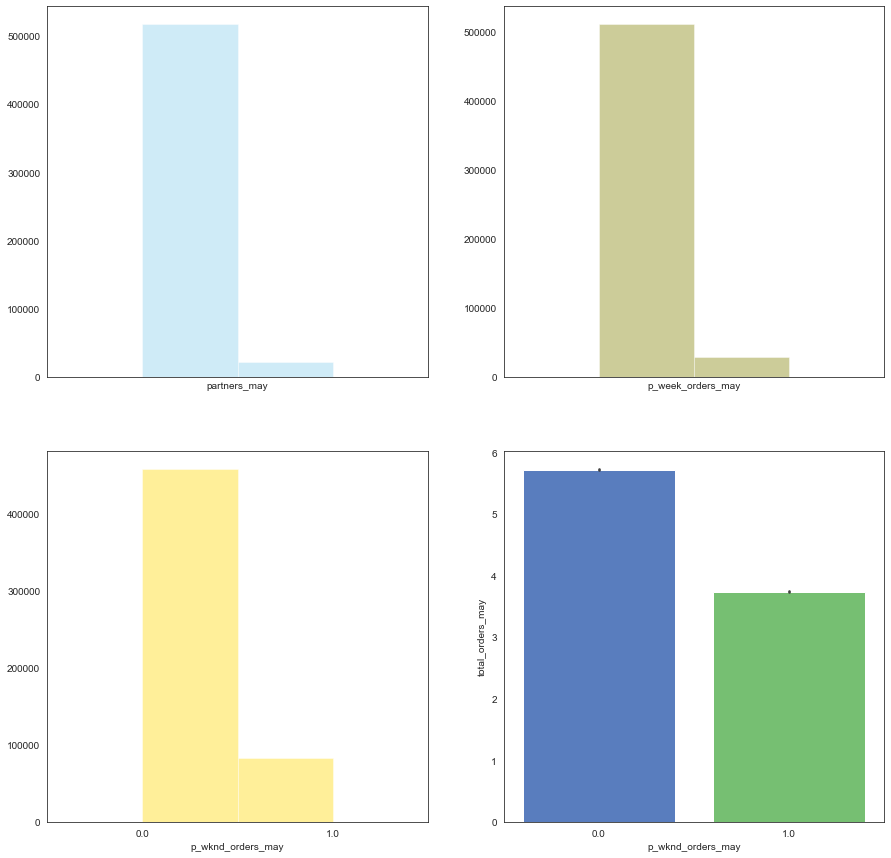

In [282]:
# comparamos distribuciones

import matplotlib.pyplot as plt

 # plot
f, axes = plt.subplots(4, 4, figsize=(15,15), sharex=True)
sns.distplot(mcm_s.partners_may.dropna() , color="skyblue", ax=axes[0, 0],bins=2, kde=False)
sns.distplot(mcm_s.p_week_orders_may, color="olive", ax=axes[0,1],bins=2, kde=False)
sns.distplot(mcm_s.p_wknd_orders_may, color="gold", ax=axes[1,0],bins=2, kde=False)
sns.distplot(mcm_s.p_lunch_orders_may.dropna() , color="skyblue", ax=axes[0, 0],bins=2, kde=False)
sns.distplot(mcm_s.p_dinner_orders_may, color="olive", ax=axes[0,1],bins=2, kde=False)
sns.distplot(mcm_s.p_wknd_orders_may, color="gold", ax=axes[1,0],bins=2, kde=False)

In [333]:
mcm_s.iloc[:,np.r_[2:5,12:14,45]].head()

,partners_may,p_wknd_orders_may,p_week_orders_may,p_lunch_orders_may,p_dinner_orders_may,p_order_discount_abr
0,0.00,0.00,0.00,0.00,0.00,nan
1,0.00,0.00,0.00,0.00,0.00,nan
2,0.00,1.00,0.00,1.00,0.00,0.10
3,0.00,1.00,0.00,0.00,1.00,nan
4,0.00,0.00,0.00,0.00,0.00,0.00


In [296]:
mcm_s.iloc[:,np.r_[25:28,35:45]].head()

,partners_abr,p_wknd_orders_abr,p_week_orders_abr,p_lunch_orders_abr,p_dinner_orders_abr,p_hamburguesas_abr,p_pizzas_abr,p_empanadas_abr,p_helados_abr,p_sushi_abr,p_pollo_abr,p_milanesas_abr,p_sandwiches_abr
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [297]:
mcm_s["tops_may"]=mcm_s.iloc[:,np.r_[2:5,12:22]].sum(axis=1)
mcm_s["tops_abr"]=mcm_s.iloc[:,np.r_[25:28,35:45]].sum(axis=1)

In [245]:
pd.crosstab(index=mcm_s.tops_abr,columns=mcm_s.tops_may,
            values = mcm_s.total_orders_may , aggfunc = "count", dropna=False, margins=True, normalize= False)

tops_may,0.0,1.0,2.0,3.0,4.0,All
tops_abr,,,,,,
0.0,134029,140757,85341,22383,637,383147
1.0,37409,38896,19011,4038,100,99454
2.0,14282,18560,11235,2777,65,46919
3.0,2558,3949,2660,893,32,10092
4.0,60,112,94,33,3,302
All,188338,202274,118341,30124,837,539914


In [246]:
pd.crosstab(index=mcm_s.tops_abr.fillna('missing'),columns=mcm_s.tops_may.fillna('missing'),
            values = mcm_s.total_orders_may.fillna('missing') , aggfunc = "count", dropna=False, normalize='columns')

tops_may,0.00,1.00,2.00,3.00,4.00
tops_abr,,,,,
0.00,0.46,0.70,0.72,0.74,0.76
1.00,0.31,0.19,0.16,0.13,0.12
2.00,0.18,0.09,0.09,0.09,0.08
3.00,0.05,0.02,0.02,0.03,0.04
4.00,0.00,0.00,0.00,0.00,0.00


In [211]:
mcm_s.tops_abr.value_counts(sort = True, dropna = True, ascending= False, normalize = True)

0.00   0.57
1.00   0.25
2.00   0.14
3.00   0.03
4.00   0.00
Name: tops_abr, dtype: float64

In [215]:
mcm_s.tops_may.value_counts(sort = True, dropna = True, ascending= False, normalize = False)

0.00    406951
1.00    202274
2.00    118341
3.00     30124
4.00       837
Name: tops_may, dtype: int64

In [216]:
mcm_s.tops_may.value_counts(sort = True, dropna = True, ascending= False, normalize = True)

0.00   0.54
1.00   0.27
2.00   0.16
3.00   0.04
4.00   0.00
Name: tops_may, dtype: float64

In [329]:
mcm_s.head()

,userid,total_orders_may,partners_may,p_wknd_orders_may,p_week_orders_may,p_lunes_may,p_martes_may,p_miercoles_may,p_jueves_may,p_viernes_may,...,p_sandwiches_abr,p_order_discount_abr,p_coupon_abr,users,main_cuisine_abr,main_cuisine_may,tops_may,tops_abr,dia_abr,dia_may
0,18379938,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,1,0,0,0.00,0.00,0,0
1,16545147,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,1,0,0,0.00,0.00,0,0
2,6975189,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.10,0.00,1,0,0,2.00,0.00,0,0
3,6932103,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,1,0,0,2.00,0.00,0,0
4,15277379,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1,0,0,0.00,1.00,0,0


In [345]:
mcm_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758527 entries, 0 to 758526
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   userid                758527 non-null  int64  
 1   total_orders_may      539914 non-null  float64
 2   partners_may          539914 non-null  float64
 3   p_wknd_orders_may     539914 non-null  float64
 4   p_week_orders_may     539914 non-null  float64
 5   p_lunes_may           539914 non-null  float64
 6   p_martes_may          539914 non-null  float64
 7   p_miercoles_may       539914 non-null  float64
 8   p_jueves_may          539914 non-null  float64
 9   p_viernes_may         539914 non-null  float64
 10  p_sabado_may          539914 non-null  float64
 11  p_domingo_may         539914 non-null  float64
 12  p_lunch_orders_may    539914 non-null  float64
 13  p_dinner_orders_may   539914 non-null  float64
 14  p_hamburguesas_may    539914 non-null  float64
 15  

In [350]:
mcm_s.iloc[:,np.r_[2,12:14,49,53]].head()

,partners_may,p_lunch_orders_may,p_dinner_orders_may,main_cuisine_may,dia_may
0,0.00,0.00,0.00,0,0
1,0.00,0.00,0.00,0,0
2,0.00,1.00,0.00,0,0
3,0.00,0.00,1.00,0,0
4,0.00,0.00,0.00,0,0


In [352]:
mcm_s[["partners_may","p_lunch_orders_may","p_dinner_orders_may","main_cuisine_may","dia_may"]].loc[mcm_s.tops_may==2].sum()

partners_may           7918.00
p_lunch_orders_may     8538.00
p_dinner_orders_may   43457.00
main_cuisine_may      13168.00
dia_may                8076.00
dtype: float64

### Weekend

In [119]:
print("De los"
      , mcm_s.total_orders_may.count()
      ,"usuarios que hicieron más de tres órdenes en el mes de mayo,"
      , mcm_s.total_orders_may.loc[(mcm_s.p_wknd_orders_may==1)].count()
      ,"lo hicieron sólo los fines de semana, son un"
      , round((mcm_s.total_orders_may.loc[(mcm_s.p_wknd_orders_may==1)].count()/mcm_s.total_orders_may.count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_wknd_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_wknd_orders_may==1))].sum()
      ,"órdenes en el mes"
     )

De los 539914 usuarios que hicieron más de tres órdenes en el mes de mayo, 82299 lo hicieron sólo los fines de semana, son un 15.24 % del total de usuarios de Argentina y un 15.24 % de los que hicieron más de tres órdenes. Estos hicieron un total de 307862 órdenes en el mes


### Weekday

In [120]:
print("De los"
      ,mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      ,mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_week_orders_may==1))].count()
      ,"lo hicieron sólo entre semana, son un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_week_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_week_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_week_orders_may==1))].sum()
      ,"órdenes en el mes"
     )

De los 539914 usuarios que hicieron más de tres órdenes en el mes, 28701 lo hicieron sólo entre semana, son un 5.32 % del total de usuarios de Argentina y un 5.32 % de los que hicieron más de tres órdenes. Estos hicieron un total de 102884 órdenes en el mes


### Lunch

In [121]:
print("De los"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_lunch_orders_may==1))].count()
      ,"lo hicieron antes de las 16 hs, son un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_lunch_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_lunch_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_lunch_orders_may==1))].sum()
      ,"órdenes en el mes."
     )

De los 539914 usuarios que hicieron más de tres órdenes en el mes, 33724 lo hicieron antes de las 16 hs, son un 6.25 % del total de usuarios de Argentina y un 6.25 % de los que hicieron más de tres órdenes. Estos hicieron un total de 148614 órdenes en el mes.


### Dinner

In [122]:
print("De los"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_dinner_orders_may==1))].count()
      ,"lo hicieron luego de las 16 hs, son un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_dinner_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_dinner_orders_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_dinner_orders_may==1))].sum()
      ,"órdenes en el mes."
     )

De los 539914 usuarios que hicieron más de tres órdenes en el mes, 185670 lo hicieron luego de las 16 hs, son un 34.39 % del total de usuarios de Argentina y un 34.39 % de los que hicieron más de tres órdenes. Estos hicieron un total de 801465 órdenes en el mes.


### Helados

In [123]:
print("De los"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_helados_may==1))].count()
      ,"lo hicieron en partners cuyo main cuisine es helado, son un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_helados_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_helados_may==1))].count()/mcm_s.total_orders_may.loc[(mcm_s.total_orders_may>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm_s.total_orders_may.loc[((mcm_s.total_orders_may>=3)&(mcm_s.p_helados_may==1))].sum()
      ,"órdenes en el mes."
     )

De los 539914 usuarios que hicieron más de tres órdenes en el mes, 12787 lo hicieron en partners cuyo main cuisine es helado, son un 2.37 % del total de usuarios de Argentina y un 2.37 % de los que hicieron más de tres órdenes. Estos hicieron un total de 44484 órdenes en el mes.


### Hamburguesas

In [124]:
print("De los"
      , mcm.total_orders.loc[((mcm.total_orders>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_hamburguesas==1))].count()
      ,"lo hicieron en partners cuyo main cuisine es hamburguesa, son un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_hamburguesas==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_hamburguesas==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_hamburguesas==1))].sum()
      ,"órdenes en el mes."
     )

De los 1033672 usuarios que hicieron más de tres órdenes en el mes, 15662 lo hicieron en partners cuyo main cuisine es hamburguesa, son un 0.48 % del total de usuarios de Argentina y un 1.52 % de los que hicieron más de tres órdenes. Estos hicieron un total de 56902 órdenes en el mes.


### shop-list

In [125]:
print("De los"
      , mcm.total_orders.loc[((mcm.total_orders>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_shop_list==1))].count()
      ,"lo hicieron sólo en el shop-list, son un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_shop_list==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_shop_list==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_shop_list==1))].sum()
      ,"órdenes en el mes."
     )

AttributeError: 'DataFrame' object has no attribute 'p_shop_list'

### Search

In [126]:
print("De los"
      , mcm.total_orders.loc[((mcm.total_orders>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_search==1))].count()
      ,"lo hicieron sólo usando el search, son un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_search==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_search==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_search==1))].sum()
      ,"órdenes en el mes."
     )

AttributeError: 'DataFrame' object has no attribute 'p_search'

In [127]:
mcm['p_shop_list']=np.round((mcm.shop_list/mcm.total_orders),1)
mcm['p_filter_tr']=np.round((mcm.filter_tr/mcm.total_orders),1)
mcm['p_search']=np.round((mcm.search/mcm.total_orders),1)

AttributeError: 'DataFrame' object has no attribute 'shop_list'

### Hamburguesa los fines de semana

In [128]:
print("De los"
      , mcm.total_orders.loc[((mcm.total_orders>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_hamburguesas==1))].count()
      ,"lo hicieron en partners cuyo main cuisine es hamburguesa y sólo los fines de semana, son un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_hamburguesas==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_hamburguesas==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_hamburguesas==1))].sum()
      ,"órdenes en el mes."
     )

De los 1033672 usuarios que hicieron más de tres órdenes en el mes, 2685 lo hicieron en partners cuyo main cuisine es hamburguesa y sólo los fines de semana, son un 0.08 % del total de usuarios de Argentina y un 0.26 % de los que hicieron más de tres órdenes. Estos hicieron un total de 8937 órdenes en el mes.


### Helados los fines de semana

In [129]:
print("De los"
      , mcm.total_orders.loc[((mcm.total_orders>=3))].count()
      ,"usuarios que hicieron más de tres órdenes en el mes,"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_helados==1))].count()
      ,"lo hicieron en partners cuyo main cuisine es helado y sólo los fines de semana, son un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_helados==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=1)].count())*100,2)
      ,"% del total de usuarios de Argentina y un"
      , round((mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_helados==1))].count()/mcm.total_orders.loc[(mcm.total_orders>=3)].count())*100,2)
      ,"% de los que hicieron más de tres órdenes."
      ,"Estos hicieron un total de"
      , mcm.total_orders.loc[((mcm.total_orders>=3)&(mcm.p_wknd_orders==1)&(mcm.p_helados==1))].sum()
      ,"órdenes en el mes."
     )

De los 1033672 usuarios que hicieron más de tres órdenes en el mes, 9257 lo hicieron en partners cuyo main cuisine es helado y sólo los fines de semana, son un 0.29 % del total de usuarios de Argentina y un 0.9 % de los que hicieron más de tres órdenes. Estos hicieron un total de 30381 órdenes en el mes.
